In [1]:
# preparing package, object, and library
import pandas as pd
import numpy as np 

In [2]:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
# 1. normalization 
from sklearn.preprocessing import MinMaxScaler

In [3]:
X_train1, X_test1, y_train1,y_test1 = np.load('X_train1.npy'),np.load('X_test1.npy'),np.load('y_train1.npy'),np.load('y_test1.npy')
X_train2, X_test2, y_train2,y_test2 = np.load('X_train2.npy'),np.load('X_test2.npy'),np.load('y_train2.npy'),np.load('y_test2.npy')
X_train3, X_test3, y_train3,y_test3 = np.load('X_train3.npy'),np.load('X_test3.npy'),np.load('y_train3.npy'),np.load('y_test3.npy')
X_train4, X_test4, y_train4,y_test4 = np.load('X_train4.npy'),np.load('X_test4.npy'),np.load('y_train4.npy'),np.load('y_test4.npy')

scaler = MinMaxScaler()
scaler.fit(X_train1)
X_normal1 = scaler.transform(X_train1)
scaler.fit(X_train2)
X_normal2 = scaler.transform(X_train2)
scaler.fit(X_train3)
X_normal3 = scaler.transform(X_train3)
scaler.fit(X_train4)
X_normal4 = scaler.transform(X_train4)

In [4]:
def get_bad_features(pValue,thr):
    list_bad_feature=[]
    for i in range(len(pValue)):
        if pValue[i] < thr:
            list_bad_feature.append(i)
    return list_bad_feature

%run ./best_featureRNA.ipynb 
%run ./Data_Conversion_1.ipynb
%run ./ML_Module_v1.ipynb
%run ./Performances_Module_1.ipynb
%run ./Data_Visualization_1.ipynb

In [6]:
thr = 0.86
f_score1 = chi2(X_normal1,y_train1)
f_score2 = chi2(X_normal2,y_train2)
f_score3 = chi2(X_normal3,y_train3)
f_score4 = chi2(X_normal4,y_train4)

pValue1 = pd.Series(f_score1[1])
pValue2 = pd.Series(f_score2[1])
pValue3 = pd.Series(f_score3[1])
pValue4 = pd.Series(f_score4[1])
        
list_bad_feature1 = get_bad_features(pValue1,thr)
list_bad_feature2 = get_bad_features(pValue2,thr)
list_bad_feature3 = get_bad_features(pValue3,thr)
list_bad_feature4 = get_bad_features(pValue4,thr)
    
    # reset X_train and X_test , remove the bad feature from dataset 
X_train11 = np.delete(X_train1, list_bad_feature1, axis=1)
X_train21 = np.delete(X_train2, list_bad_feature2, axis=1)
X_train31 = np.delete(X_train3, list_bad_feature3, axis=1)
X_train41 = np.delete(X_train4, list_bad_feature4, axis=1)
    
print(X_train11.shape)
print(X_train21.shape)
print(X_train31.shape)
print(X_train41.shape)

X_test11 = np.delete(X_test1, list_bad_feature1, axis=1)
X_test21 = np.delete(X_test2, list_bad_feature2, axis=1)
X_test31 = np.delete(X_test3, list_bad_feature3, axis=1)
X_test41 = np.delete(X_test4, list_bad_feature4, axis=1)
    
y_train11 = np.array(y_train1)
y_test11 = np.array(y_test1)
y_train21 = np.array(y_train2)
y_test21 = np.array(y_test2)
y_train31 = np.array(y_train3)
y_test31 = np.array(y_test3)
y_train41 = np.array(y_train4)
y_test41 = np.array(y_test4)
    
    

(1191, 21)
(1191, 23)
(1191, 20)
(1191, 31)


In [9]:
from sklearn.manifold import TSNE

In [22]:
X_full_1 = TSNE(n_components=2, learning_rate='auto',
                 init='random', perplexity=50).fit_transform(X_train1)
X_full_2 = TSNE(n_components=2, learning_rate='auto',
                 init='random', perplexity=50).fit_transform(X_train2)
X_full_3 = TSNE(n_components=2, learning_rate='auto',
                 init='random', perplexity=50).fit_transform(X_train3)
X_full_4 = TSNE(n_components=2, learning_rate='auto',
                 init='random', perplexity=50).fit_transform(X_train4)

In [23]:
X_reduced_1 = TSNE(n_components=2, learning_rate='auto',
                 init='random', perplexity=50).fit_transform(X_train11)
X_reduced_2 = TSNE(n_components=2, learning_rate='auto',
                 init='random', perplexity=50).fit_transform(X_train21)
X_reduced_3 = TSNE(n_components=2, learning_rate='auto',
                 init='random', perplexity=50).fit_transform(X_train31)
X_reduced_4 = TSNE(n_components=2, learning_rate='auto',
                 init='random', perplexity=50).fit_transform(X_train41)

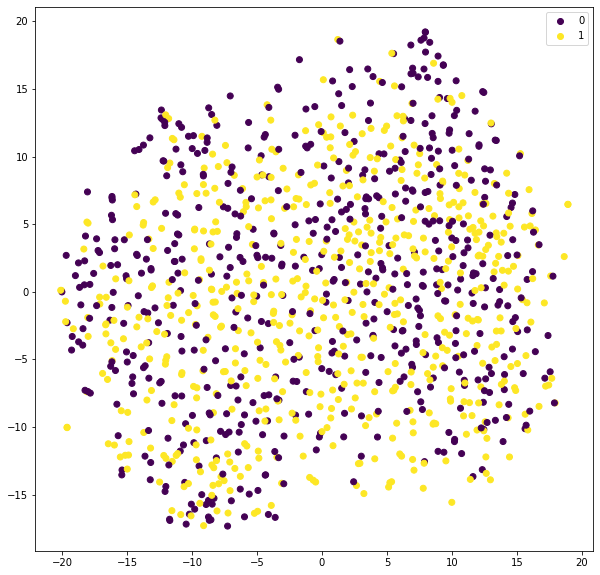

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sc = plt.scatter(X_full_3[:,0], X_full_3[:,1], c= y_train31)
plt.legend(handles = sc.legend_elements()[0], labels =list(range(2)))
plt.show()

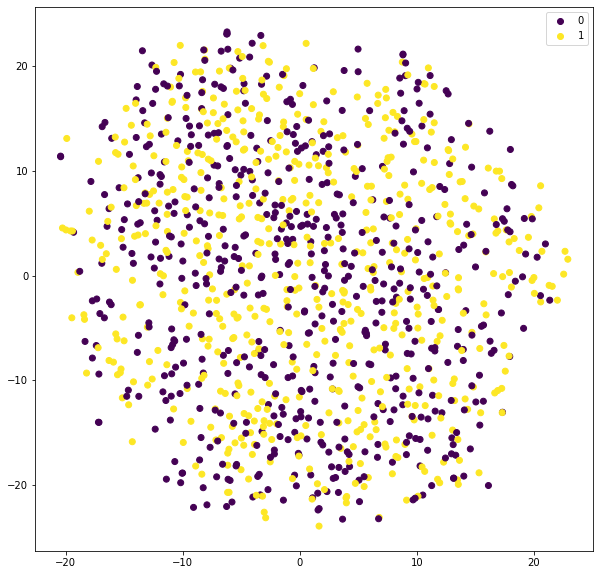

In [29]:
plt.figure(figsize=(10,10))
sc = plt.scatter(X_reduced_3[:,0], X_reduced_3[:,1], c= y_train31, )
plt.legend(handles = sc.legend_elements()[0], labels =list(range(2)))
plt.show()